## Simple Returns
$$R_t = \frac{P_t-P_{t-1}}{P_{t-1}}$$

## Log returns
$$r_t = \ln({\frac{P_t}{P_{t-1}}}) = \ln(P_t) - \ln(P_{t-1})$$

**Implementing my first script**: a script that downloads data for a stock (e.g., NVIDIA), calculates the returns, and computes a Simple Moving Average (SMA).

Modules

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Fetch Data

In [29]:
ticker = "QQQ" # NVDA, PLTR
df = yf.download(ticker, start="2023-01-01", end="2025-12-28")

[*********************100%***********************]  1 of 1 completed


In [30]:
df

Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
Date,,,,,
2023-01-03,259.795898,265.365462,257.487512,263.892028,42335300
2023-01-04,261.033569,262.713306,257.880429,261.917654,47754900
2023-01-05,256.947235,259.530661,256.632925,259.363688,45396700
2023-01-06,264.039398,265.159223,255.729238,258.685939,54659700
2023-01-09,265.748596,270.414471,265.139582,266.033439,45568700
...,...,...,...,...,...
2025-12-19,616.255981,616.825255,611.082654,611.162568,60369800
2025-12-22,619.210022,621.650024,617.770020,621.349976,43703100


Calculate Log Returns

In [31]:
# Shift(1) allows us to compare today's price to yesterday's
df['Log_Return'] = np.log(df['Close']) - np.log(df['Close'].shift(1))

Calculate Moving Average (SMA)

In [32]:
# SMA is the arithmetic mean of the last 'n' days
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

Visualization

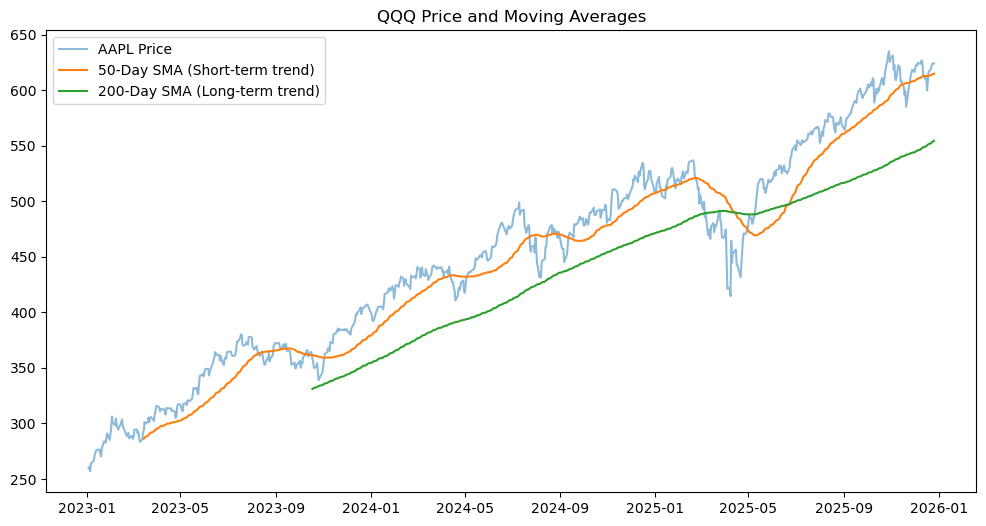

In [34]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='AAPL Price', alpha=0.5)
plt.plot(df['SMA_50'], label='50-Day SMA (Short-term trend)')
plt.plot(df['SMA_200'], label='200-Day SMA (Long-term trend)')
plt.title(f"{ticker} Price and Moving Averages")
plt.legend()
plt.show()

-The "**Golden Cross**": When the 50-day SMA crosses above the 200-day SMA. Mathematically, this suggests the short-term mean is accelerating faster than the long-term mean—a bullish signal.

-The "**Death Cross**": When the 50-day SMA crosses below the 200-day SMA.